<a href="https://colab.research.google.com/github/ANS-Research/Building_Energy_Management_System/blob/main/Copy_of_Untitled32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore all warnings
warnings.filterwarnings("ignore")

In [10]:
test = pd.read_csv('/content/datatest.txt', header=0, index_col=1, parse_dates=True, squeeze=True)

In [11]:
validate = pd.read_csv('/content/datatest2.txt', header=0, index_col=1, parse_dates=True, squeeze=True)

In [ ]:
train = pd.read_csv('/content/datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)

<ipython-input-3-5ee60ba484e6>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('/content/datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)


In [15]:
validate.drop('date', axis=1, inplace=True)

In [14]:
test.drop('date', axis=1, inplace=True)

In [ ]:
train.drop('date', axis=1, inplace=True)

In [18]:
data = pd.concat([test, train, validate])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-02 14:19:00 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


<Axes: >

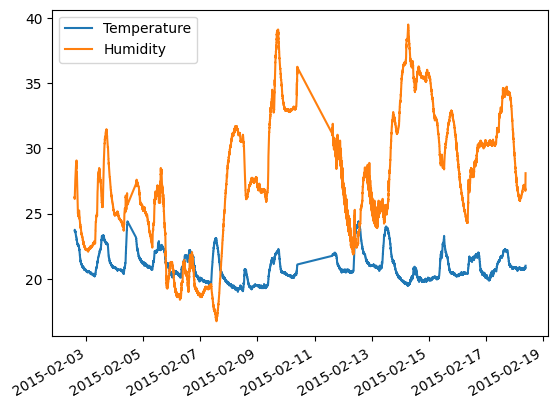

In [20]:
data[['Temperature', 'Humidity']].plot()

<Axes: >

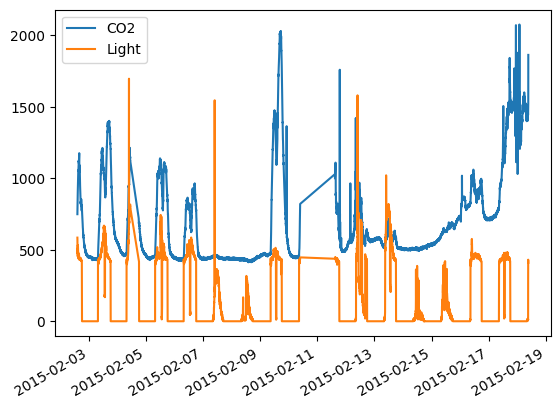

In [21]:
data[['CO2', 'Light']].plot()

In [33]:
data_new = data.reset_index()
data_new.drop('index', axis=1, inplace=True)

In [34]:
data_new.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [35]:
corr = data_new.corr()

<Axes: >

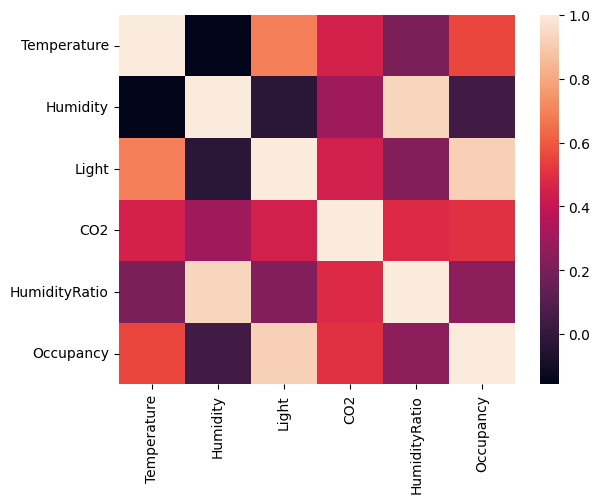

In [36]:
sns.heatmap(corr)

In [45]:
X = data_new.iloc[:, :-1]  # All columns except the last one
y = data_new.iloc[:, -1]     # Last column

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Define candidate algorithms and their hyperparameter grids
algorithms = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01]})
}

In [48]:
# Perform GridSearchCV to find the best hyperparameters for each algorithm
results = {}
for name, (algorithm, param_grid) in algorithms.items():
    clf = GridSearchCV(algorithm, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    results[name] = {
        'Best Params': clf.best_params_,
        'Best Score': clf.best_score_,
        'Model': clf.best_estimator_
    }

In [49]:
# Evaluate the models on the test set and display the results
print("Model Evaluation on Test Set:")
for name, model_info in results.items():
    model = model_info['Model']
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Model: {name}")
    print(f"Best Hyperparameters: {model_info['Best Params']}")
    print(f"Best Cross-Validation Score: {model_info['Best Score']:.3f}")
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}, ROC-AUC: {roc_auc:.3f}")
    print("--------------------------")

Model Evaluation on Test Set:
Model: Logistic Regression
Best Hyperparameters: {'C': 10.0}
Best Cross-Validation Score: 0.988
Accuracy: 0.992, Precision: 0.968, Recall: 0.996, F1-score: 0.982, ROC-AUC: 0.996
--------------------------
Model: Random Forest
Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Best Cross-Validation Score: 0.992
Accuracy: 0.994, Precision: 0.984, Recall: 0.988, F1-score: 0.986, ROC-AUC: 1.000
--------------------------
Model: Gradient Boosting
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best Cross-Validation Score: 0.991
Accuracy: 0.992, Precision: 0.977, Recall: 0.989, F1-score: 0.983, ROC-AUC: 0.999
--------------------------
